#1

Генерация данных

In [ ]:
import numpy as np

# Генерация случайных данных
X = np.random.rand(1000, 20)  # 1000 образцов, 20 признаков
y = np.random.randint(2, size=(1000, 1))  # 1000 меток класса (0 или 1)

Создание модели

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Создание модели
model = Sequential()
model.add(Dense(128, input_dim=20, activation='tanh'))  # Первый слой с 128 нейронами и tanh-активацией
model.add(Dense(1, activation='softmax'))  # Выходной слой с softmax-активацией для бинарной классификации


Компиляция модели

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

Обучение модели

In [ ]:
model.fit(X, y, epochs=10, batch_size= 32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4888 - loss: 0.7055
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4751 - loss: 0.7017
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5106 - loss: 0.6897
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5216 - loss: 0.6900
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5148 - loss: 0.6936
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4885 - loss: 0.6894
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5278 - loss: 0.6893
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4911 - loss: 0.6915
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4933 - loss: 0.6827
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5001 - loss: 0.6860


Оценка модели

In [ ]:
loss, accuracy = model.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5036 - loss: 0.7168  
Loss: 0.7182571887969971, Accuracy: 0.5049999952316284


# 2

Загрузка и продготовка данных

In [25]:
from tensorflow.keras import datasets, layers, models

# Загрузка данных MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Подготовка данных
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


Создание модели

In [26]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Первый сверточный слой
    layers.MaxPooling2D((2, 2)),  # Первый слой подвыборки
    layers.Conv2D(64, (3, 3), activation='relu'),  # Второй сверточный слой
    layers.MaxPooling2D((2, 2)),  # Второй слой подвыборки
    layers.Conv2D(64, (3, 3), activation='relu'),  # Третий сверточный слой
    layers.Flatten(),  # Выравнивание
    layers.Dense(64, activation='relu'),  # Слой с 64 нейронами
    layers.Dense(10, activation='softmax')  # Выходной слой с softmax-активацией для 10 классов
])


Комплияция модели

In [27]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Обучение модели

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8514 - loss: 0.4762 - val_accuracy: 0.9794 - val_loss: 0.0676
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9811 - loss: 0.0632 - val_accuracy: 0.9863 - val_loss: 0.0482
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9837 - val_loss: 0.0560
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9908 - loss: 0.0292 - val_accuracy: 0.9888 - val_loss: 0.0379
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9893 - val_loss: 0.0431
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9949 - loss: 0.0160 - val_accuracy: 0.9889 - val_loss: 0.0396
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9958 - loss: 0.0136 - val_accuracy: 0.9891 - val_loss: 0.0482
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9972 - loss: 0.0104 - 

Оценка модели

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9894 - loss: 0.0691
Test loss: 0.04895871505141258, Test accuracy: 0.9922999739646912


#3


Создание модели

In [7]:
# Импорты
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
model = Sequential()

# 1 сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), strides=(1, 1)))

# 2 сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(1, 1)))

# 3 сверточный слой
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(1, 1)))

# 4 сверточный слой
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(1, 1)))

# 5 сверточный слой
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(1, 1)))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Обучение

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Обучение
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.8979 - loss: 0.3129
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step - accuracy: 0.9850 - loss: 0.0473
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9888 - loss: 0.0365
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9908 - loss: 0.0287
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.9933 - loss: 0.0215
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9942 - loss: 0.0193
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9953 - loss: 0.0151
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9958 - loss: 0.0135
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9950 - loss: 0.0144
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9970 - loss: 0.0097
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.9966 - loss: 0.0115
Epoch 12/20
938/938 ━━━━━━━━━━

Оценка модели

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.3f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9887 - loss: 0.0797
Test accuracy: 0.992


#4

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/50
704/704 - 16s - 23ms/step - accuracy: 0.2231 - loss: 2.0423 - val_accuracy: 0.3104 - val_loss: 1.9306
Epoch 2/50
704/704 - 4s - 6ms/step - accuracy: 0.3820 - loss: 1.6633 - val_accuracy: 0.3822 - val_loss: 1.6613
Epoch 3/50
704/704 - 5s - 7ms/step - accuracy: 0.4656 - loss: 1.4695 - val_accuracy: 0.5440 - val_loss: 1.3032
Epoch 4/50
704/704 - 5s - 8ms/step - accuracy: 0.5130 - loss: 1.3514 - val_accuracy: 0.5306 - val_loss: 1.3330
Epoch 5/50
704/704 - 4s - 5ms/step - accuracy: 0.5502 - loss: 1.2603 - val_accuracy: 0.6014 - val_loss: 1.0981
Epoch 6/50
704/704 - 4s - 5ms/step - accuracy: 0.5788 - loss: 1.1840 - val_accuracy: 0.5322 - val_loss: 1.4263
Epoch 7/50
704/704 - 5s - 8ms/step - accuracy: 0.5967 - loss: 1.1364 - val_accuracy: 0.6352 - val_loss: 1.0811
Epoch 8/50
704/704 - 4s - 6ms/step - accuracy: 0.6251 - loss: 1.0704 - val_accuracy: 0.6336 - val_loss: 1.0173
Epoch 9/50
704/704 - 4s - 5ms/step - accuracy: 0.6395 - loss: 1.0287 - val_accuracy: 0.6486 - val_loss: 1.0283

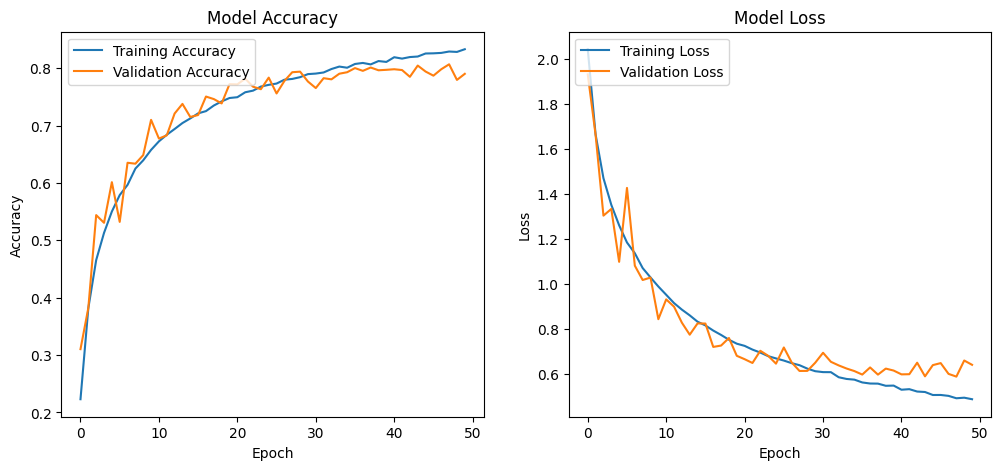

Epoch 1/50
782/782 - 8s - 10ms/step - accuracy: 0.8235 - loss: 0.5255
Epoch 2/50
782/782 - 6s - 8ms/step - accuracy: 0.8234 - loss: 0.5165
Epoch 3/50
782/782 - 5s - 7ms/step - accuracy: 0.8262 - loss: 0.5128
Epoch 4/50
782/782 - 4s - 5ms/step - accuracy: 0.8290 - loss: 0.5049
Epoch 5/50
782/782 - 4s - 5ms/step - accuracy: 0.8322 - loss: 0.4927
Epoch 6/50
782/782 - 4s - 5ms/step - accuracy: 0.8314 - loss: 0.4964
Epoch 7/50
782/782 - 5s - 6ms/step - accuracy: 0.8324 - loss: 0.4909
Epoch 8/50
782/782 - 5s - 7ms/step - accuracy: 0.8371 - loss: 0.4821
Epoch 9/50
782/782 - 4s - 5ms/step - accuracy: 0.8358 - loss: 0.4822
Epoch 10/50
782/782 - 4s - 5ms/step - accuracy: 0.8364 - loss: 0.4832
Epoch 11/50
782/782 - 5s - 7ms/step - accuracy: 0.8410 - loss: 0.4687
Epoch 12/50
782/782 - 4s - 5ms/step - accuracy: 0.8397 - loss: 0.4701
Epoch 13/50
782/782 - 5s - 6ms/step - accuracy: 0.8411 - loss: 0.4658
Epoch 14/50
782/782 - 4s - 5ms/step - accuracy: 0.8430 - loss: 0.4606
Epoch 15/50
782/782 - 5s - 7

In [3]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_split=0.1, shuffle=True, verbose=2)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {scores[1] * 100:.2f}%")

# Plot the history for accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

# Train the model on the full dataset without validation split
model.fit(X_train, y_train, batch_size=64, epochs=50, shuffle=True, verbose=2)
